In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import time
from scipy.special import expit
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.preprocessing import normalize
from sklearn.metrics import log_loss
from sklearn.datasets import load_digits
from algorithms import *
plt.rcParams['figure.figsize'] = [12, 10]

C:\Users\Wei\anaconda3\envs\tensorflow-gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Load data and split train and test
digits = load_digits()
X = digits.data
y = convert_labels(digits.target).reshape(len(digits.target),1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [3]:
#Train
w1,b1,costs1 = Logistic_Regression_Batch_GD(X_train, y_train, eta=0.001, K=10000)
w2,b2,costs2 = Logistic_Regression_SGD(X_train, y_train, eta=0.0001, K=10000)
w3,b3,costs3 = Logistic_Regression_GA(X_train, y_train, eta=0.0001, K=10000)
w4,b4,costs4 = Logistic_Regression_SAG(X_train, y_train, eta=0.00041, K=10000)
w5,b5,costs5 = Logistic_Regression_SAG_L2(X_train, y_train, eta=0.00041, K=10000, L=0.02)
w6,b6,costs6 = Logistic_Regression_SAGA(X_train, y_train, eta=0.0002, K=10000)

#Test
y_pred1 = Predict(X_test,w1,b1)
y_pred2 = Predict(X_test,w2,b2)
y_pred3 = Predict(X_test,w3,b3)
y_pred4 = Predict(X_test,w4,b4)
y_pred5 = Predict(X_test,w5,b5)
y_pred6 = Predict(X_test,w6,b6)

#Accuracies
print("Test Accuracy for batch GD:", accuracy_score(y_test, y_pred1))
print("Test Accuracy for SGD:", accuracy_score(y_test, y_pred2))
print("Test Accuracy for GA:", accuracy_score(y_test, y_pred3))
print("Test Accuracy for SAG:", accuracy_score(y_test, y_pred4))
print("Test Accuracy for SAG_L2:", accuracy_score(y_test, y_pred5))
print("Test Accuracy for SAGA:", accuracy_score(y_test, y_pred6))

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1797.35it/s]

Test Accuracy for batch GD: 0.9111111111111111
Test Accuracy for SGD: 0.8866666666666667
Test Accuracy for GA: 0.8977777777777778
Test Accuracy for SAG: 0.9133333333333333
Test Accuracy for SAG_L2: 0.9155555555555556
Test Accuracy for SAGA: 0.9222222222222223


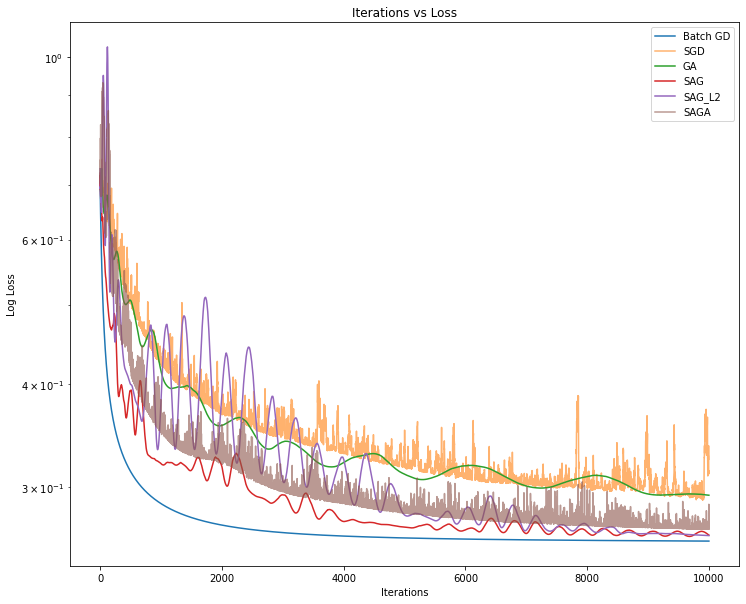

In [4]:
#Plots
plt.plot(np.arange(len(costs1)),costs1, label="Batch GD")
plt.plot(np.arange(len(costs2)),costs2, label="SGD", alpha=0.6)
plt.plot(np.arange(len(costs3)),costs3, label="GA")
plt.plot(np.arange(len(costs4)),costs4, label="SAG")
plt.plot(np.arange(len(costs5)),costs5, label="SAG_L2")
plt.plot(np.arange(len(costs6)),costs6, label="SAGA", alpha=0.6)

plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.title("Iterations vs Loss")
plt.legend()
plt.yscale("log");

In [5]:
# def Logistic_Regression_Reg(x, y, eta, K, L):
#     b = 0.1
#     costs = []
#     w = np.zeros([x.shape[1],1])
#     y = y.reshape((len(y),1))
#     for k in tqdm(range(K)):
#         #make prediction
#         y_pred = bound(sigmoid(x@w+b))
        
#         #update weights
#         w = w - eta*(x.T@(y_pred-y)+2*L*w)
#         b = b - eta*np.sum(y_pred-y)
        
#         #compute cost
#         cost = -np.sum(y.T@np.log(y_pred) + (1-y).T@np.log(1-y_pred))/K
#         cost += L*(np.linalg.norm(w,2))**2
#         costs += [cost]
        
#     return w, b, np.array(costs)
    
    
# def Logistic_Regression_SGD(x, y, eta, epoch):
#     b = 0.1
#     costs = []
#     w = np.zeros([x.shape[1],1])
#     y = y.reshape((len(y),1))
#     for k in tqdm(range(epoch)):
#         np.random.seed(42)
#         idx = np.random.permutation(len(x))
#         xx = x[idx]
#         yy = y[idx]
#         #for each data point
#         for i in range(len(x)):
#             a = eta
#             #make prediction
#             y_pred = bound(sigmoid(xx[i]@w+b))
            
#             #update weights
#             grad = (xx[i]*(y_pred-yy[i])).reshape((64,1))
#             w = w - a*grad
#             b = b - a*(y_pred-yy[i])

#             #compute cost
#             costs += [log_loss(yy[i], y_pred, labels = [0,1])]
        
#     return w, b, np.array(costs)

# def Logistic_Regression_SAG(x, y, eta, K):
#     #Initialize weights and bias
#     b = 0.1
#     w = np.zeros([x.shape[1],1])
#     g = 0
#     g_prev = 0
#     table = 0
    
#     costs = []
#     y = y.reshape((len(y),1))
    
#     #For each iteration
#     for k in tqdm(range(K)):
        
#         #Draw random sample with replacement
#         idx = np.random.randint(0,len(x))
#         xx = x[idx]
#         yy = y[idx]
        
#         #Fixed learning rate
#         a = eta
#         #a = eta/np.sqrt(k+1)
        
#         #Make prediction
#         y_pred = bound(sigmoid(xx@w+b))

#         #Update weights
#         n = k+1
#         grad = (xx*(y_pred-yy)).reshape((64,1))
 
#         w = w - a*(grad + g/n)
#         b = b - a*(y_pred-yy)
        
#         g += grad
#         g_prev = grad

#         #Compute cost
#         pred = bound(sigmoid(x@w+b))
#         costs += [log_loss(y, pred, labels = [0,1])]
        
#     return w, b, np.array(costs)

In [6]:
# def convert_labels(y):
#     y = np.where(y<5, 0, y)
#     return np.where(y>4, 1, y)

# def sigmoid(x):
#     return expit(x)

# def bound(x):
#     x = np.where(x<1e-16,1e-16,x)
#     return np.where(x>1-(1e-16), (1-1e-16), x)

# def Predict(x,w,b):
#     pred = bound(sigmoid(x@w+b))
#     pred = np.where(pred>0.5, 1, pred)
#     return np.where(pred<=0.5, 0 ,pred)

# def Logistic_Regression_Batch_GD(x, y, eta, K):
#     #Initialize weights and bias
#     b = 0.1
#     w = np.zeros([x.shape[1],1])
#     n = len(x)
    
#     costs = []
#     y = y.reshape((len(y),1))
    
#     #For each iteration
#     for k in tqdm(range(K)):
        
#         #Make prediction
#         y_pred = bound(sigmoid(x@w+b))
        
#         #Update weights
#         w = w - eta*(x.T@(y_pred-y)/n)
#         b = b - eta*np.sum(y_pred-y)
        
#         #Compute cost
#         costs += [log_loss(y, y_pred)]
        
#     return w, b, np.array(costs)

# def Logistic_Regression_SGD(x, y, eta, K):
#     #Initialize weights and bias
#     b = 0.1
#     w = np.zeros([x.shape[1],1])
    
#     costs = []
#     y = y.reshape((len(y),1))
    
#     #For each iteration
#     for k in tqdm(range(K)):
        
#         #Draw random sample with replacement
#         idx = np.random.randint(0,len(x))
#         xx = x[idx]
#         yy = y[idx]
        
#         #Fixed learning rate
#         a = eta
#         #a = eta/np.sqrt(k+1)
        
#         #Make prediction
#         y_pred = bound(sigmoid(xx@w+b))

#         #Update weights
#         grad = (xx*(y_pred-yy)).reshape((64,1))
#         w = w - a*grad
#         b = b - a*(y_pred-yy)

#         #Compute cost
#         pred = bound(sigmoid(x@w+b))
#         costs += [log_loss(y, pred, labels = [0,1])]
        
#     return w, b, np.array(costs)

# def Logistic_Regression_GA(x, y, eta, K):
#     #Initialize weights and bias
#     b = 0.1
#     w = np.zeros([x.shape[1],1])
#     g = 0
    
#     costs = []
#     y = y.reshape((len(y),1))
    
#     #For each iteration
#     for k in tqdm(range(K)):
        
#         #Draw random sample with replacement
#         idx = np.random.randint(0,len(x))
#         xx = x[idx]
#         yy = y[idx]
        
#         #Fixed learning rate
#         a = eta
#         #a = eta/np.sqrt(k+1)
        
#         #Make prediction
#         y_pred = bound(sigmoid(xx@w+b))

#         #Update weights
#         n = k+1
#         grad = (xx*(y_pred-yy)).reshape((64,1))
#         g += grad
 
#         w = w - a*(g/n)
#         b = b - a*(y_pred-yy)

#         #Compute cost
#         pred = bound(sigmoid(x@w+b))
#         costs += [log_loss(y, pred, labels = [0,1])]
        
#     return w, b, np.array(costs)

# def Logistic_Regression_SAG(x, y, eta, K):
#     #Initialize weights and bias
#     b = 0.1
#     w = np.zeros([x.shape[1],1])
#     g = np.zeros((len(x), 64,1)) #Gradient table
#     g_prev = 0 #Previous gradient
#     idxs = []
#     m = 0
    
#     costs = []
#     y = y.reshape((len(y),1))
    
#     #For each iteration
#     for k in tqdm(range(K)):
        
#         #Draw random sample with replacement
#         idx = np.random.randint(0,len(x))
#         xx = x[idx]
#         yy = y[idx]
        
#         #Fixed learning rate
#         a = eta
        
#         #Make prediction
#         y_pred = bound(sigmoid(xx@w+b))

#         #Check if data point has been seen
#         if idx not in idxs:
#             idxs += [idx]
#             m += 1
        
#         #Calculate current gradient
#         grad = (xx*(y_pred-yy)).reshape((64,1))
 
#         #Update weights
#         w = w - a*(grad - g_prev + np.sum(g, axis=0))/m
#         b = b - a*(y_pred-yy)
        
#         g[idx] = grad
#         g_prev = grad

#         #Compute cost
#         pred = bound(sigmoid(x@w+b))
#         costs += [log_loss(y, pred, labels = [0,1])]
        
#     return w, b, np.array(costs)

# def Logistic_Regression_SAG_L2(x, y, eta, K, L):
#     #Initialize weights and bias
#     b = 0.1
#     w = np.zeros([x.shape[1],1])
#     g = np.zeros((len(x), 64,1)) #Gradient table
#     g_prev = 0 #Previous gradient
#     idxs = []
#     m = 0
    
#     costs = []
#     y = y.reshape((len(y),1))
    
#     #For each iteration
#     for k in tqdm(range(K)):
        
#         #Draw random sample with replacement
#         idx = np.random.randint(0,len(x))
#         xx = x[idx]
#         yy = y[idx]
        
#         #Fixed learning rate
#         a = eta
        
#         #Make prediction
#         y_pred = bound(sigmoid(xx@w+b))

#         #Check if data point has been seen
#         if idx not in idxs:
#             idxs += [idx]
#             m += 1
        
#         #Calculate current gradient
#         grad = (xx*(y_pred-yy)).reshape((64,1))
 
#         #Update weights
#         w = w - a*((grad/m - g_prev/m + np.sum(g, axis=0)/m) + L*w)
#         b = b - a*(y_pred-yy)
        
#         g[idx] = grad
#         g_prev = grad

#         #Compute cost
#         pred = bound(sigmoid(x@w+b))
#         costs += [log_loss(y, pred, labels = [0,1])]
        
#     return w, b, np.array(costs)

# def Logistic_Regression_SAGA(x, y, eta, K):
#     #Initialize weights and bias
#     b = 0.1
#     w = np.zeros([x.shape[1],1])
#     g = np.zeros((len(x), 64,1)) #Gradient table
#     g_prev = 0 #Previous gradient
#     idxs = []
#     m = 0
    
#     costs = []
#     y = y.reshape((len(y),1))
    
#     #For each iteration
#     for k in tqdm(range(K)):
        
#         #Draw random sample with replacement
#         idx = np.random.randint(0,len(x))
#         xx = x[idx]
#         yy = y[idx]
        
#         #Fixed learning rate
#         a = eta
        
#         #Make prediction
#         y_pred = bound(sigmoid(xx@w+b))

#         #Check if data point has been seen
#         if idx not in idxs:
#             idxs += [idx]
#             m += 1
        
#         #Calculate current gradient
#         grad = (xx*(y_pred-yy)).reshape((64,1))
 
#         #Update weights
#         w = w - a*(grad - g_prev + np.sum(g, axis=0)/m)
#         b = b - a*(y_pred-yy)
        
#         g[idx] = grad
#         g_prev = grad

#         #Compute cost
#         pred = bound(sigmoid(x@w+b))
#         costs += [log_loss(y, pred, labels = [0,1])]
        
#     return w, b, np.array(costs)